## Gaussian Transformation with Feature-Engine

Scikit-learn has recently released transformers to do Gaussian mappings as they call the variable transformations. The PowerTransformer allows to do Box-Cox and Yeo-Johnson transformation. With the FunctionTransformer, we can specify any function we want.

The transformers per se, do not allow to select columns, but we can do so using a third transformer, the ColumnTransformer

Another thing to keep in mind is that Scikit-learn transformers return NumPy arrays, and not dataframes, so we need to be mindful of the order of the columns not to mess up with our features.

## Important

Box-Cox and Yeo-Johnson transformations need to learn their parameters from the data. Therefore, as always, before attempting any transformation it is important to divide the dataset into train and test set.

In this demo, I will not do so for simplicity, but when using this transformation in your pipelines, please make sure you do so.


## In this demo

We will see how to implement variable transformations using Scikit-learn and the House Prices dataset.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import scipy.stats as stats

from feature_engine import variable_transformers as vt

In [2]:
data = pd.read_csv('../houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Plots to assess normality

To visualise the distribution of the variables, we plot a histogram and a Q-Q plot. In the Q-Q pLots, if the variable is normally distributed, the values of the variable should fall in a 45 degree line when plotted against the theoretical quantiles. We discussed this extensively in Section 3 of this course.

In [3]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

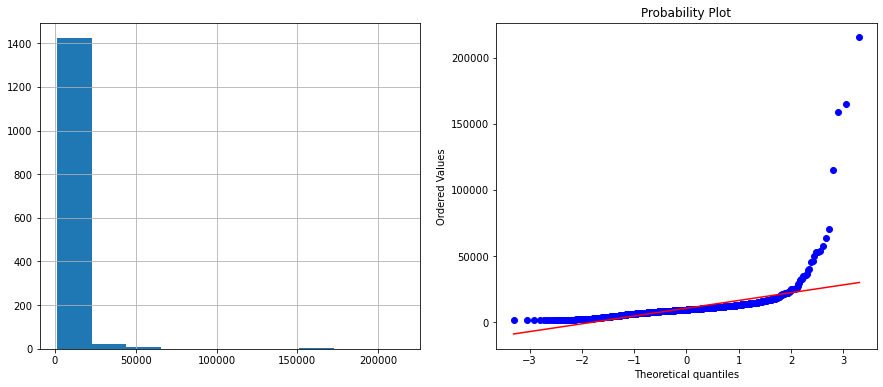

In [4]:
diagnostic_plots(data, 'LotArea')

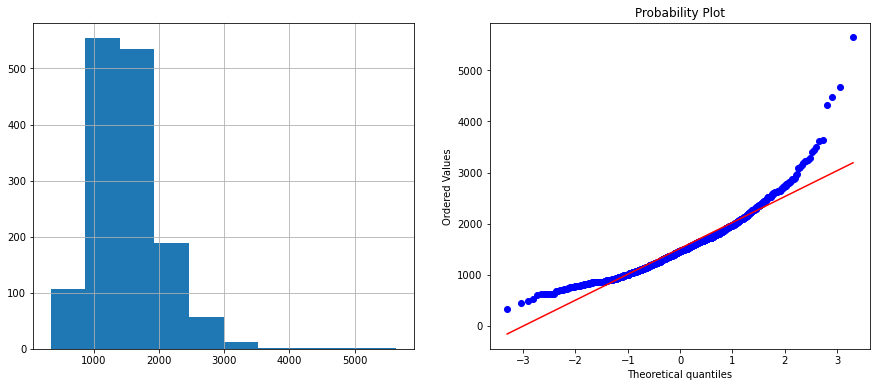

In [5]:
diagnostic_plots(data, 'GrLivArea')

## LogTransformer

In [6]:
lt = vt.LogTransformer(variables = ['LotArea', 'GrLivArea'])
lt.fit(data)

LogTransformer(base='e', variables=['LotArea', 'GrLivArea'])

In [7]:
# variables that will be transformed
lt.variables

['LotArea', 'GrLivArea']

In [8]:
data_tf = lt.transform(data)

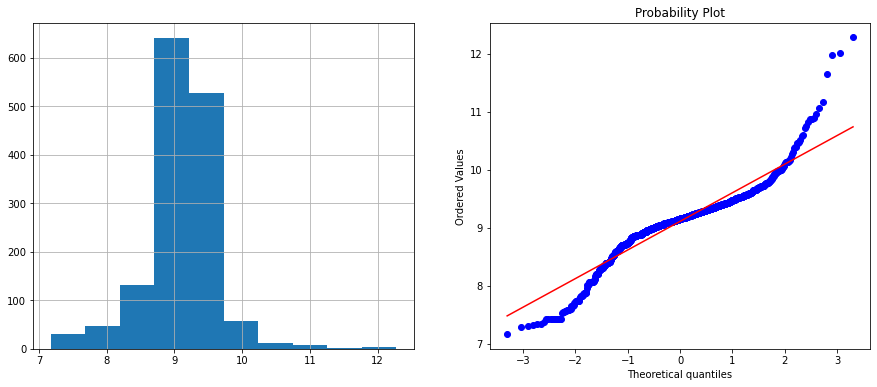

In [9]:
diagnostic_plots(data_tf, 'LotArea')

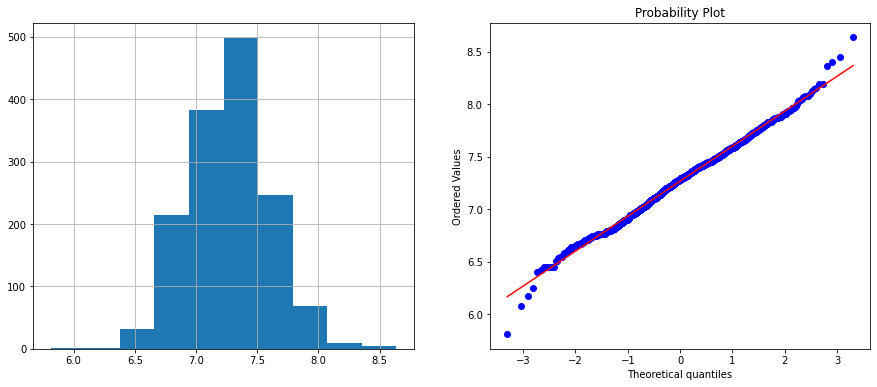

In [10]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')

## ReciprocalTransformer

In [11]:
rt = vt.ReciprocalTransformer(variables = ['LotArea', 'GrLivArea'])
rt.fit(data)

ReciprocalTransformer(variables=['LotArea', 'GrLivArea'])

In [12]:
data_tf = rt.transform(data)

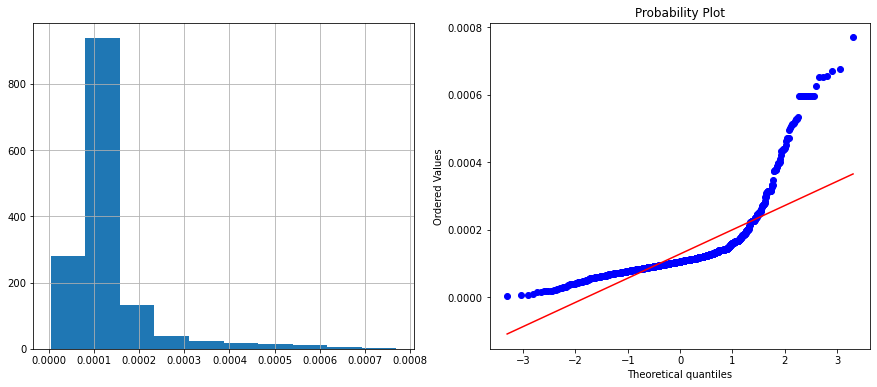

In [13]:
diagnostic_plots(data_tf, 'LotArea')

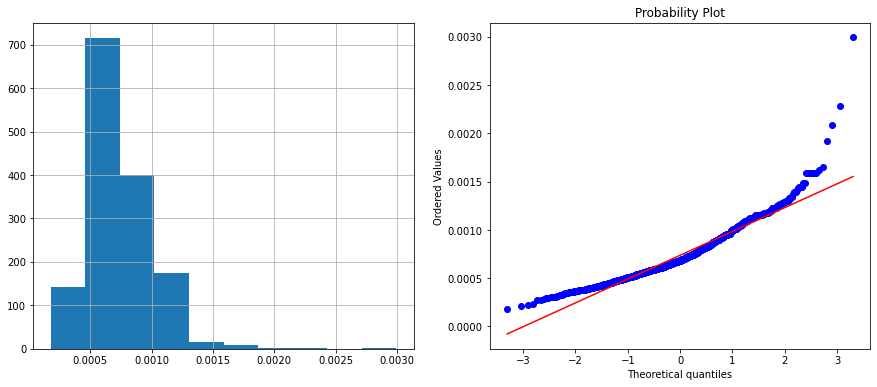

In [14]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')

## ExponentialTransformer

In [15]:
et = vt.PowerTransformer(variables = ['LotArea', 'GrLivArea'])
et.fit(data)

PowerTransformer(exp=0.5, variables=['LotArea', 'GrLivArea'])

In [16]:
data_tf = et.transform(data)

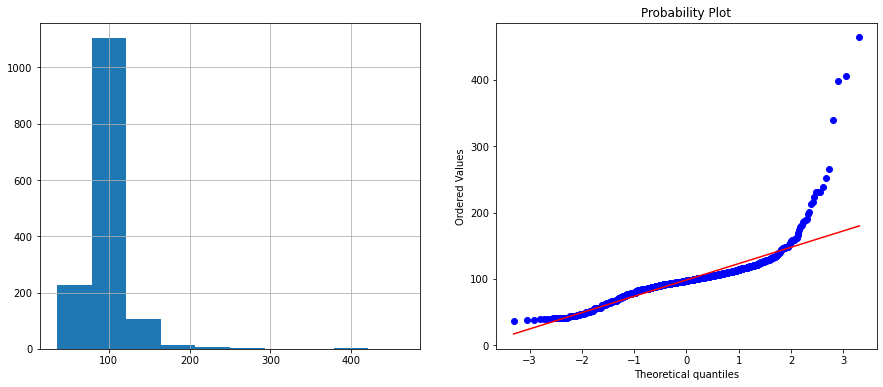

In [17]:
diagnostic_plots(data_tf, 'LotArea')

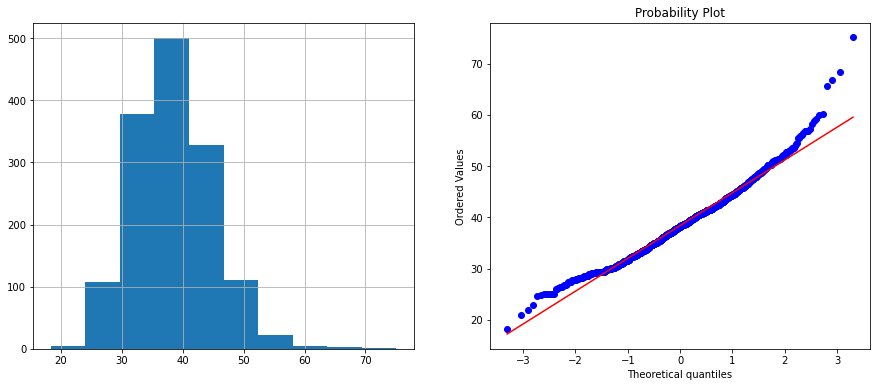

In [18]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')

## BoxCoxTransformer

In [19]:
bct = vt.BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])
bct.fit(data)

BoxCoxTransformer(variables=['LotArea', 'GrLivArea'])

In [20]:
# these are the exponents for the BoxCox transformation
bct.lambda_dict_

{'LotArea': 0.03094631071248529, 'GrLivArea': 0.006304924353543215}

In [21]:
data_tf = bct.transform(data)

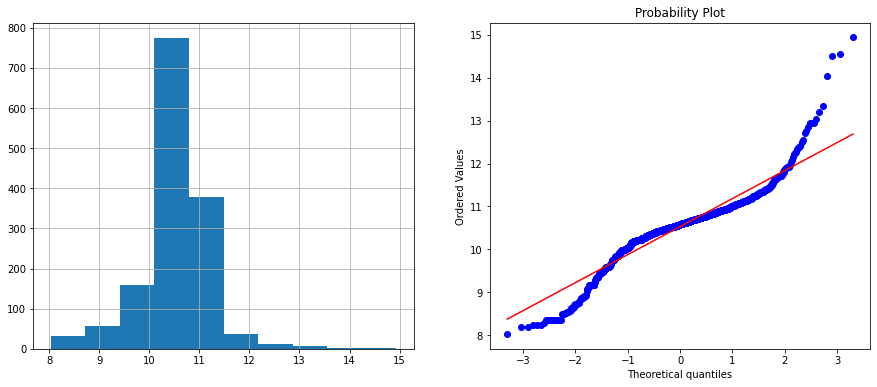

In [22]:
diagnostic_plots(data_tf, 'LotArea')

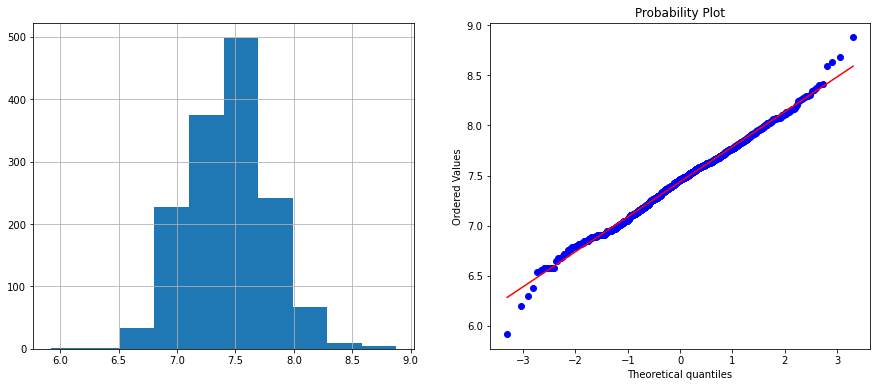

In [23]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')

## Yeo-Johnson Transformer

Yeo-Johnson Transformer will be available in the next release of Feauture-Engine!!!

In [24]:
yjt = vt.YeoJohnsonTransformer(variables = ['LotArea', 'GrLivArea'])
yjt.fit(data)

YeoJohnsonTransformer(variables=['LotArea', 'GrLivArea'])

In [25]:
# these are the exponents for the Yeo-Johnson transformation
yjt.lambda_dict_

{'LotArea': 0.03081854079393649, 'GrLivArea': 0.005539641278705955}

In [26]:
data_tf = yjt.transform(data)

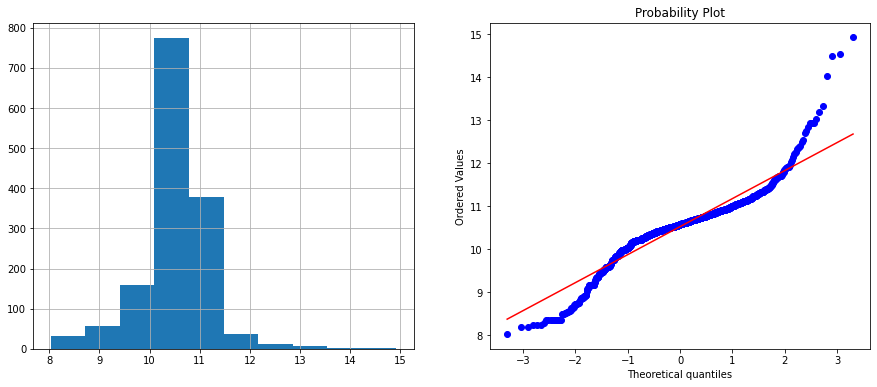

In [27]:
diagnostic_plots(data_tf, 'LotArea')

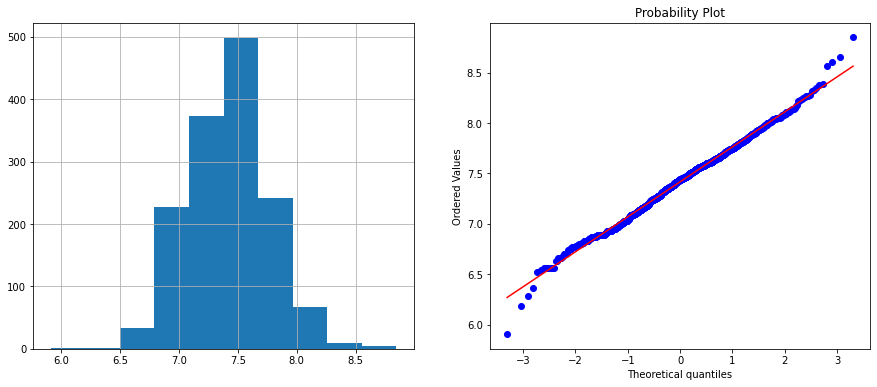

In [28]:
# transformed variable
diagnostic_plots(data_tf, 'GrLivArea')